Dataset fer2013.csv berhasil dimuat.
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Jumlah sampel training: 28709
Jumlah sampel validation: 7178
Bentuk data training: (28709, 48, 48, 1)
Bentuk label training: (28709, 7)


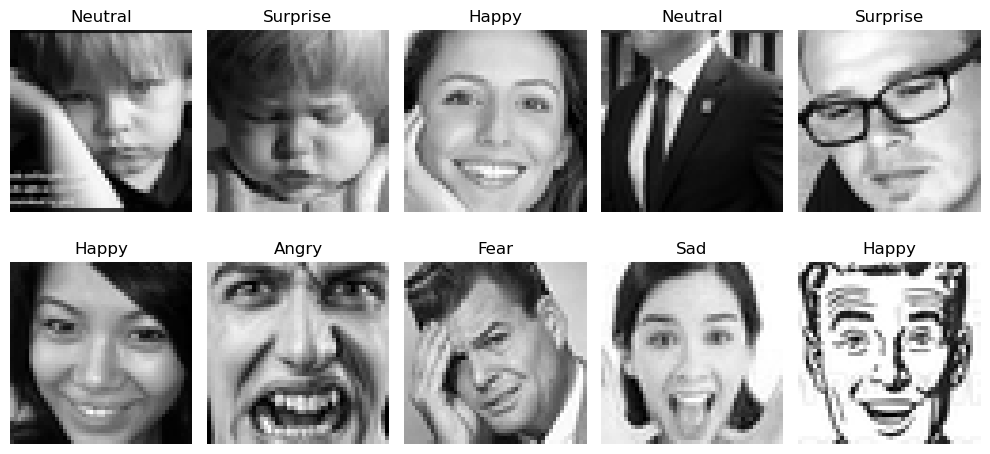

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2 # OpenCV for image processing
import os

# --- 1. Muat Dataset (Asumsi: fer2013.csv ada di folder yang sama) ---
    data = pd.read_csv('fer2013.csv')
    print("Dataset fer2013.csv berhasil dimuat.")
    print(data.head())
    # Membuat data dummy jika file tidak ditemukan
    # Ini hanya untuk demonstrasi agar kode bisa jalan tanpa file.
    # Emosi: 0=Marah, 1=Jijik, 2=Takut, 3=Senang, 4=Netral, 5=Sedih, 6=Terkejut
    dummy_pixels = [' '.join(map(str, np.random.randint(0, 256, 48*48))) for _ in range(100)]
    dummy_emotions = np.random.randint(0, 7, 100)
    dummy_usage = ['Training'] * 80 + ['PublicTest'] * 20
    data = pd.DataFrame({'emotion': dummy_emotions, 'pixels': dummy_pixels, 'Usage': dummy_usage})


# --- 2. Preprocessing Data ---
# Mendefinisikan label emosi
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Konversi string piksel ke array numpy
def preprocess_pixels(pixel_string):
    pixels = np.array(pixel_string.split(' '), dtype='float32')
    # Reshape ke 48x48 dan normalisasi ke [0, 1]
    pixels = pixels.reshape(48, 48) / 255.0
    return pixels

X = np.array([preprocess_pixels(p) for p in data['pixels']])
y = to_categorical(data['emotion'], num_classes=len(emotion_labels))

# Tambahkan dimensi channel (untuk grayscale, 1 channel)
X = np.expand_dims(X, axis=-1)

# Bagi data menjadi training dan validation set
# Kita bisa menggunakan 'Usage' kolom dari fer2013.csv atau train_test_split
# Untuk contoh sederhana, mari kita gunakan train_test_split dari data yang sudah kita proses
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah sampel training: {len(X_train)}")
print(f"Jumlah sampel validation: {len(X_val)}")
print(f"Bentuk data training: {X_train.shape}")
print(f"Bentuk label training: {y_train.shape}")

# --- Visualisasi Contoh Gambar dan Label ---
plt.figure(figsize=(10, 5))
for i in range(10): # Tampilkan 10 contoh gambar
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(emotion_labels[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\Farros\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,375 (4.86 MB)

 Trainable params: 1,274,375 (4.86 MB)

 Non-trainable params: 0 (0.00 B)


Memulai pelatihan model...
Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.2595 - loss: 1.8050 - val_accuracy: 0.3759 - val_loss: 1.5762 - learning_rate: 0.0010
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.3887 - loss: 1.5682 - val_accuracy: 0.4575 - val_loss: 1.4196 - learning_rate: 0.0010
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4452 - loss: 1.4352 - val_accuracy: 0.4919 - val_loss: 1.3445 - learning_rate: 0.0010
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4790 - loss: 1.3656 - val_accuracy: 0.5091 - val_loss: 1.2795 - learning_rate: 0.0010
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4988 - loss: 1.3155 - val_accuracy: 0.5346 - val_loss: 1.2352 - learning_rate: 0.0010
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.5252 - loss: 1.2556 - val_accuracy: 0.5499 - val_loss: 1.1980 - learning_rate: 0.0010
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms

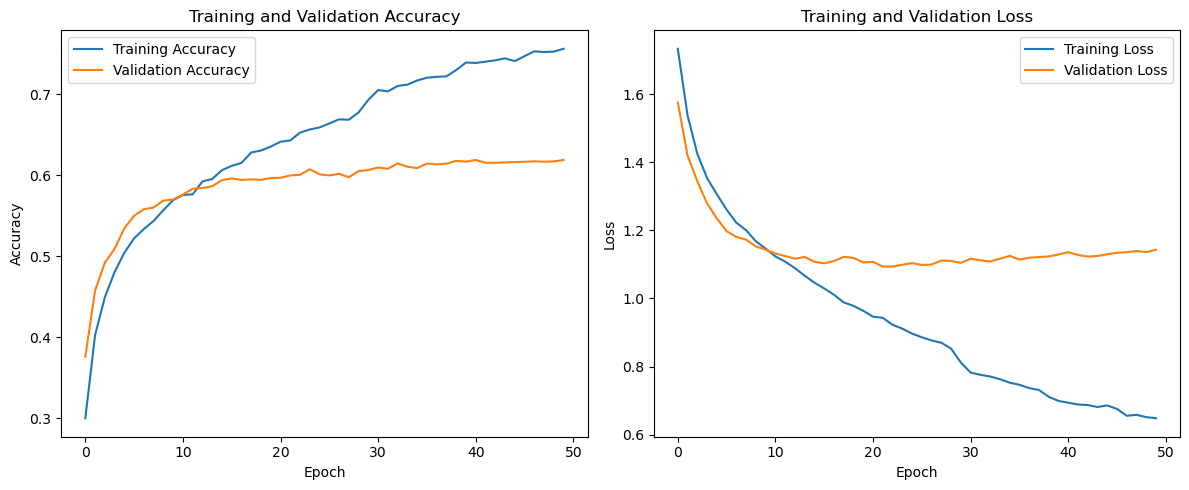

Model berhasil disimpan ke: emotion_detector_model_simple.h5


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- 1. Bangun Arsitektur Model CNN ---
def build_simple_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Lapisan Konvolusi 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25), # Mencegah overfitting

        # Lapisan Konvolusi 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Lapisan Konvolusi 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Meratakan output untuk lapisan Dense
        Flatten(),

        # Lapisan Dense (Fully Connected)
        Dense(256, activation='relu'),
        Dropout(0.5),

        # Lapisan Output
        Dense(num_classes, activation='softmax') # Softmax untuk klasifikasi multi-kelas
    ])
    return model

# Tentukan bentuk input berdasarkan data kita (48x48 piksel, 1 channel grayscale)
input_shape = (48, 48, 1)
# Tentukan jumlah kelas emosi
num_classes = len(emotion_labels) # emotion_labels dari kode sebelumnya (7 emosi)

# Buat model
model = build_simple_cnn_model(input_shape, num_classes)

# Tampilkan ringkasan model
model.summary()

# --- 2. Kompilasi Model ---
# Kita akan menggunakan optimizer Adam dan fungsi loss categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- 3. Melatih Model ---
# Callbacks untuk pelatihan yang lebih baik
# EarlyStopping: Berhenti melatih jika akurasi validasi tidak meningkat
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
# ReduceLROnPlateau: Mengurangi learning rate jika metrik tidak membaik
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.00001)


print("\nMemulai pelatihan model...")
# Latih model
history = model.fit(
    X_train, y_train,
    epochs=50, # Jumlah epoch yang cukup untuk model sederhana
    batch_size=64, # Ukuran batch, sesuaikan dengan RAM jika perlu
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)
print("Pelatihan model selesai.")

# --- 4. Visualisasi Hasil Pelatihan ---
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# --- 5. Simpan Model (Opsional tapi Direkomendasikan) ---
# Simpan model agar bisa digunakan nanti tanpa perlu melatih ulang
model_save_path = 'emotion_detector_model_simple.h5'
model.save(model_save_path)
print(f"Model berhasil disimpan ke: {model_save_path}")

Model berhasil dimuat dari: emotion_detector_model_simple.h5

Mencoba prediksi pada gambar sampel...
Ditemukan 13 wajah. Akan memproses wajah terbesar.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Emosi Terdeteksi: Surprise (Kepercayaan: 41.02%)


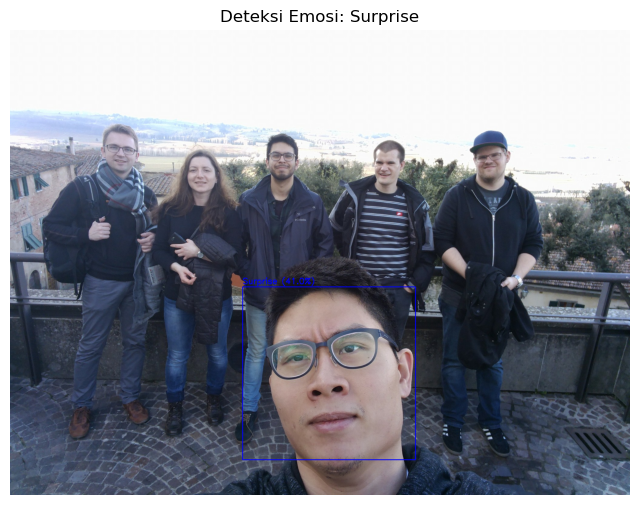

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# --- 1. Muat Ulang Model yang Sudah Disimpan ---
# Pastikan path ini sesuai dengan tempat kamu menyimpan model
model_save_path = 'emotion_detector_model_simple.h5'
try:
    model = load_model(model_save_path)
    print(f"Model berhasil dimuat dari: {model_save_path}")
except Exception as e:
    print(f"Gagal memuat model: {e}")
    print("Pastikan model_save_path benar dan model sudah disimpan.")

emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# --- 2. Siapkan Detektor Wajah OpenCV (Haar Cascade) ---
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(face_cascade_path)

if face_detector.empty():
    print(f"Error: Tidak dapat memuat detektor wajah dari {face_cascade_path}")
    print("Pastikan file haarcascade_frontalface_default.xml ada di lokasi tersebut.")

# --- 3. Buat Fungsi Prediksi Emosi ---
def predict_emotion(image_path):
    if face_detector.empty():
        print("Detektor wajah tidak dimuat. Tidak dapat melanjutkan prediksi.")
        return None, None

    # Baca gambar
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Tidak dapat membaca gambar dari {image_path}")
        return None, None

    # Konversi gambar ke grayscale (model kita dilatih dengan grayscale)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah dalam gambar
    faces = face_detector.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("Tidak ada wajah terdeteksi dalam gambar.")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Tidak ada wajah terdeteksi")
        plt.axis('off')
        plt.show()
        return None, None
    elif len(faces) > 1:
        print(f"Ditemukan {len(faces)} wajah. Akan memproses wajah terbesar.")
        # Jika ada beberapa wajah, ambil yang terbesar (opsional)
        faces = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)


    # Ambil wajah pertama (atau terbesar) yang terdeteksi
    x, y, w, h = faces[0]

    # Potong (crop) wajah dari gambar grayscale
    face_roi_gray = gray_img[y:y+h, x:x+w]

    # Ubah ukuran wajah ke 48x48 piksel (sesuai input model)
    resized_face = cv2.resize(face_roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

    # Normalisasi piksel ke rentang [0, 1]
    normalized_face = resized_face / 255.0

    # Tambahkan dimensi batch dan channel (1, 48, 48, 1)
    input_face = np.expand_dims(np.expand_dims(normalized_face, axis=-1), axis=0)

    # Lakukan prediksi menggunakan model
    predictions = model.predict(input_face)
    predicted_emotion_index = np.argmax(predictions[0])
    predicted_emotion_label = emotion_labels[predicted_emotion_index]
    confidence = predictions[0][predicted_emotion_index] * 100 # dalam persentase

    print(f"Emosi Terdeteksi: {predicted_emotion_label} (Kepercayaan: {confidence:.2f}%)")

    # Gambar kotak di sekitar wajah dan tampilkan emosi yang diprediksi
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2) # Kotak biru
    text = f"{predicted_emotion_label} ({confidence:.1f}%)"
    # Tambahkan teks di atas kotak wajah, sesuaikan posisi jika perlu
    cv2.putText(img, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Tampilkan gambar dengan deteksi
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV membaca BGR, Matplotlib butuh RGB
    plt.title(f"Deteksi Emosi: {predicted_emotion_label}")
    plt.axis('off')
    plt.show()

    return predicted_emotion_label, confidence

# --- 4. Contoh Penggunaan ---
# Untuk mencoba, kamu perlu memiliki gambar wajah di direktori yang sama
# atau berikan path lengkap ke gambar tersebut.
# Misalnya, simpan gambar 'happy_face.jpg' atau 'sad_face.png' di folder kamu.

# Buat dummy gambar jika tidak ada untuk demo
dummy_image_name = 'test_image.jpg'
if not os.path.exists(dummy_image_name):
    # Membuat gambar dummy sederhana
    dummy_img_data = np.zeros((200, 200, 3), dtype=np.uint8)
    cv2.putText(dummy_img_data, "Test Face", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.imwrite(dummy_image_name, dummy_img_data)
    print(f"Membuat gambar dummy: {dummy_image_name}")

# Panggil fungsi prediksi
print("\nMencoba prediksi pada gambar sampel...")
emotion, conf = predict_emotion(dummy_image_name)

# Jika kamu punya gambar lain, coba ganti path-nya:
# emotion, conf = predict_emotion('path/ke/gambar_wajahmu.jpg')

In [10]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# --- 1. Muat Ulang Model yang Sudah Disimpan ---
model_save_path = 'emotion_detector_model_simple.h5'
try:
    model = load_model(model_save_path)
    print(f"Model berhasil dimuat dari: {model_save_path}")
except Exception as e:
    print(f"Gagal memuat model: {e}")
    print("Pastikan model_save_path benar dan model sudah disimpan dari langkah sebelumnya.")
    # Jika gagal, kita bisa keluar atau memberikan pesan error yang jelas
    exit() # Menghentikan eksekusi jika model tidak ditemukan

# Mendefinisikan ulang label emosi (penting agar konsisten)
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# --- 2. Siapkan Detektor Wajah OpenCV (Haar Cascade) ---
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(face_cascade_path)

if face_detector.empty():
    print(f"Error: Tidak dapat memuat detektor wajah dari {face_cascade_path}")
    print("Pastikan file haarcascade_frontalface_default.xml ada di lokasi tersebut.")
    exit() # Menghentikan eksekusi jika detektor tidak ditemukan

# --- 3. Buat Fungsi Prediksi Emosi yang Kompatibel dengan Gradio ---
# Fungsi ini akan menerima gambar sebagai input (format NumPy array)
def detect_emotion_gradio(input_img_np):
    if input_img_np is None:
        return None, "Tidak ada gambar yang diunggah."

    if face_detector.empty():
        return input_img_np, "Error: Detektor wajah tidak dimuat."

    # Gradio memberikan gambar sebagai NumPy array (biasanya RGB)
    # Konversi gambar ke grayscale (model kita dilatih dengan grayscale)
    # Gradio juga mungkin memberikan RGBA, jadi kita cek dimensinya
    if input_img_np.shape[2] == 4: # RGBA
        gray_img = cv2.cvtColor(input_img_np, cv2.COLOR_RGBA2GRAY)
    else: # RGB
        gray_img = cv2.cvtColor(input_img_np, cv2.COLOR_RGB2GRAY)
    
    # Simpan salinan gambar asli untuk menggambar kotak nanti
    # Pastikan ini BGR jika ingin OpenCV menggambar warna yang benar (255,0,0 adalah biru)
    # Gradio memberikan RGB, jadi kita bisa tetap di RGB untuk output display
    display_img = input_img_np.copy() 

    # Deteksi wajah dalam gambar grayscale
    faces = face_detector.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        message = "Tidak ada wajah terdeteksi dalam gambar."
        return display_img, message # Kembalikan gambar asli dan pesan
    
    # Jika ada beberapa wajah, ambil yang terbesar
    faces = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)
    x, y, w, h = faces[0]

    # Potong (crop) wajah dari gambar grayscale
    face_roi_gray = gray_img[y:y+h, x:x+w]

    # Ubah ukuran wajah ke 48x48 piksel (sesuai input model)
    resized_face = cv2.resize(face_roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

    # Normalisasi piksel ke rentang [0, 1]
    normalized_face = resized_face / 255.0

    # Tambahkan dimensi batch dan channel (1, 48, 48, 1)
    input_face = np.expand_dims(np.expand_dims(normalized_face, axis=-1), axis=0)

    # Lakukan prediksi menggunakan model
    predictions = model.predict(input_face)
    predicted_emotion_index = np.argmax(predictions[0])
    predicted_emotion_label = emotion_labels[predicted_emotion_index]
    confidence = predictions[0][predicted_emotion_index] * 100 # dalam persentase

    # Gambar kotak di sekitar wajah dan teks emosi pada gambar asli
    # Warna kotak dalam RGB (karena display_img adalah RGB)
    # Gradio akan menampilkan gambar ini
    color = (255, 0, 0) # Merah dalam RGB
    thickness = 2
    cv2.rectangle(display_img, (x, y), (x+w, y+h), color, thickness)
    text = f"{predicted_emotion_label} ({confidence:.1f}%)"
    # Tambahkan teks di atas kotak wajah
    cv2.putText(display_img, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, thickness)

    result_text = f"Emosi Terdeteksi: {predicted_emotion_label} (Kepercayaan: {confidence:.2f}%)"
    return display_img, result_text

# --- 4. Buat Antarmuka Gradio ---
# input adalah sebuah komponen Image, output adalah Image dan Text
iface = gr.Interface(
    fn=detect_emotion_gradio,
    inputs=gr.Image(type="numpy", label="Unggah Gambar Wajah"),
    outputs=[
        gr.Image(type="numpy", label="Hasil Deteksi Wajah dan Emosi"),
        gr.Textbox(label="Ringkasan Prediksi")
    ],
    title="Facial Emotion Detector",
    description="Unggah gambar wajah untuk mendeteksi emosi utamanya.",
    examples=[
        # Kamu bisa menambahkan contoh gambar di sini jika punya
        # Misalnya: ["path/to/your/happy_face.jpg"], ["path/to/your/sad_face.jpg"]
        # Untuk demo, kita bisa pakai gambar yang diunggah pengguna jika ada
        # Jika kamu punya contoh gambar di folder kamu, bisa tambahkan di sini:
        # ["./sample_face.jpg"] # Contoh dari langkah sebelumnya jika sudah dibuat
    ]
)

# Jalankan antarmuka Gradio
print("\nMenjalankan antarmuka Gradio...")
iface.launch(share=True) # share=True akan membuat public link sementara

Model berhasil dimuat dari: emotion_detector_model_simple.h5

Menjalankan antarmuka Gradio...
* Running on local URL:  http://127.0.0.1:7864

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [2]:
import cv2
from keras.models import load_model
import numpy as np

# Memuat model yang telah dilatih
# Pastikan 'path_to_your_model.h5' adalah path yang benar ke file model Anda
model = load_model('emotion_detector_model_simple.h5') 

# Daftar emosi (pastikan urutan ini sesuai dengan output model Anda)
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
# Inisialisasi webcam
# 0 biasanya merujuk pada webcam default. Jika Anda memiliki beberapa webcam, Anda mungkin perlu mengubah angka ini.
cap = cv2.VideoCapture(0) 

# Periksa apakah webcam berhasil dibuka
if not cap.isOpened():
    print("Error: Tidak dapat membuka webcam.")
    exit()

print("Webcam terbuka. Tekan 'q' untuk keluar.")

while True:
    # Membaca frame demi frame dari webcam
    ret, frame = cap.read() # ret adalah boolean (True jika frame berhasil dibaca), frame adalah gambar itu sendiri

    if not ret:
        print("Gagal mengambil frame dari webcam. Keluar...")
        break

    # Konversi frame ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Mengubah ukuran gambar sesuai dengan input model (48x48)
    # Model Anda dilatih dengan gambar 48x48 piksel
    resized_gray = cv2.resize(gray, (48, 48)) 

    # Normalisasi dan reshape untuk input model
    # Model Keras biasanya mengharapkan input dalam bentuk batch, tinggi, lebar, channel
    # Untuk grayscale, channel adalah 1
    normalized_gray = resized_gray.astype('float32') / 255.0
    input_model = np.reshape(normalized_gray, (1, 48, 48, 1))

    # Memprediksi emosi
    predictions = model.predict(input_model)
    
    # Mengambil indeks emosi dengan probabilitas tertinggi
    emotion_index = np.argmax(predictions[0]) # predictions[0] karena kita memprediksi satu gambar (batch size 1)
    
    # Mendapatkan nama emosi yang terdeteksi
    emotion = emotions[emotion_index]

    # Menampilkan emosi yang terdeteksi di atas frame
    # cv2.putText(gambar, teks, posisi, font, skala_font, warna, ketebalan)
    cv2.putText(frame, emotion, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Menampilkan frame di jendela
    cv2.imshow('Deteksi Emosi (Live)', frame)

    # Menunggu tombol 'q' ditekan untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Melepaskan webcam dan menutup semua jendela OpenCV
cap.release()
cv2.destroyAllWindows()

Webcam terbuka. Tekan 'q' untuk keluar.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━

In [2]:
import cv2
from keras.models import load_model
import numpy as np

# --- Bagian 1: Memuat Model dan Konfigurasi ---

# Memuat model yang telah dilatih
# GANTI 'path_to_your_model.h5' dengan lokasi file model .h5 Anda yang sebenarnya
model = load_model('emotion_detector_model_simple.h5')

# Daftar emosi (pastikan urutan ini sesuai dengan urutan output dari model Anda)
emotions = ['Marah', 'Takut', 'Senang', 'Sedih', 'Terkejut', 'Netral'] 

# --- Bagian 2: Fungsi Utama Deteksi Emosi dari Live Cam ---

def detect_emotion_live():
    # Inisialisasi webcam
    # 0 biasanya merujuk pada webcam default. Jika Anda memiliki beberapa webcam,
    # Anda mungkin perlu mencoba angka lain (misalnya 1, 2, dst.).
    cap = cv2.VideoCapture(0) 

    # Periksa apakah webcam berhasil dibuka
    if not cap.isOpened():
        print("Error: Tidak dapat membuka webcam. Pastikan webcam terhubung dan tidak digunakan oleh aplikasi lain.")
        return

    print("Webcam terbuka. Arahkan wajah Anda ke kamera. Tekan 'q' untuk keluar.")

    while True:
        # Membaca frame demi frame dari webcam
        ret, frame = cap.read() # ret adalah boolean (True jika frame berhasil dibaca), frame adalah gambar itu sendiri

        if not ret:
            print("Gagal mengambil frame dari webcam. Keluar...")
            break

        # Konversi frame ke grayscale (model Anda mungkin dilatih dengan grayscale)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Mengubah ukuran gambar sesuai dengan input model (misalnya, 48x48 piksel)
        # Model FER2013 biasanya menggunakan input 48x48
        resized_gray_frame = cv2.resize(gray_frame, (48, 48)) 

        # Normalisasi piksel ke rentang [0, 1] dan reshape untuk input model Keras
        # Model Keras biasanya mengharapkan input dalam bentuk (batch_size, tinggi, lebar, channel)
        # Untuk gambar grayscale, channel adalah 1
        normalized_input = resized_gray_frame.astype('float32') / 255.0
        input_for_model = np.reshape(normalized_input, (1, 48, 48, 1))

        # Memprediksi emosi menggunakan model
        predictions = model.predict(input_for_model)
        
        # Mendapatkan indeks emosi dengan probabilitas tertinggi dari hasil prediksi
        # predictions[0] karena kita memproses satu gambar (batch size 1)
        emotion_index = np.argmax(predictions[0]) 
        
        # Mendapatkan nama emosi yang terdeteksi dari daftar `emotions`
        detected_emotion = emotions[emotion_index]

        # Menampilkan emosi yang terdeteksi di atas frame
        # cv2.putText(gambar, teks, posisi_xy, font, skala_font, warna_bgr, ketebalan, jenis_garis)
        cv2.putText(frame, detected_emotion, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Menampilkan frame di jendela
        cv2.imshow('Deteksi Emosi (Live)', frame)

        # Menunggu tombol 'q' ditekan untuk keluar
        # cv2.waitKey(1) akan menunggu 1 milidetik untuk input keyboard
        # & 0xFF == ord('q') adalah cara untuk memeriksa apakah tombol 'q' ditekan
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # --- Bagian 3: Pembersihan Sumber Daya ---

    # Melepaskan objek webcam
    cap.release()
    # Menutup semua jendela OpenCV
    cv2.destroyAllWindows()

# --- Jalankan Fungsi Deteksi Emosi ---
if __name__ == "__main__":
    detect_emotion_live()

Webcam terbuka. Arahkan wajah Anda ke kamera. Tekan 'q' untuk keluar.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━

IndexError: list index out of range